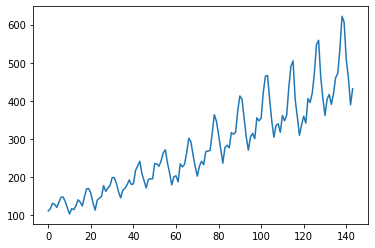

In [15]:
# Пакеты, используемые в работе
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Пропускаем первый столбец данных, содержащий дату
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

In [16]:
# Преобразование целочисленных значений в значения с плавающей запятой, более подходящие для нейросети
dataset = dataframe.values
dataset = dataset.astype('float32')
# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [17]:
# Разделим упорядоченный набор данных в соотношении 2:1
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [18]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение.

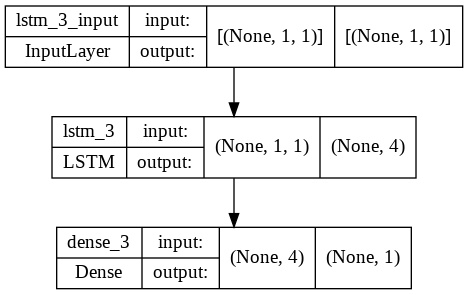

In [20]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0679 - mae: 0.2046 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0335 - mae: 0.1386 - 146ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0243 - mae: 0.1239 - 149ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0214 - mae: 0.1204 - 138ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0199 - mae: 0.1164 - 142ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0188 - mae: 0.1131 - 155ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0177 - mae: 0.1096 - 140ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0167 - mae: 0.1072 - 137ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0157 - mae: 0.1036 - 152ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0148 - mae: 0.1005 - 152ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0140 - mae: 0.0976 - 171ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0130 - mae: 0.0944 - 146ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0122 - mae: 0.0914 - 153ms/epoch - 2ms/st

In [22]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

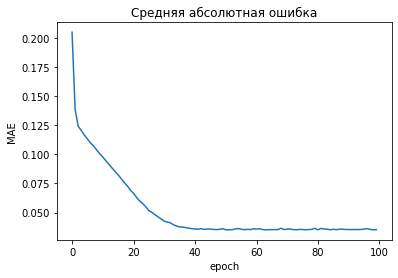

In [23]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [24]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.90 RMSE
Test Score: 47.93 RMSE


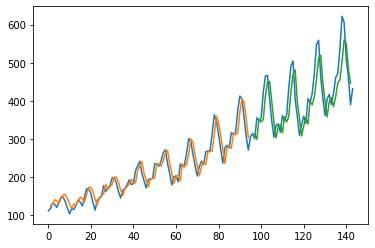

In [25]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Фильчагин

 # Сеть с двумя слоями: LSTM слой с 8 нейронами и выходной слой, выдающий 1 значение.

In [26]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

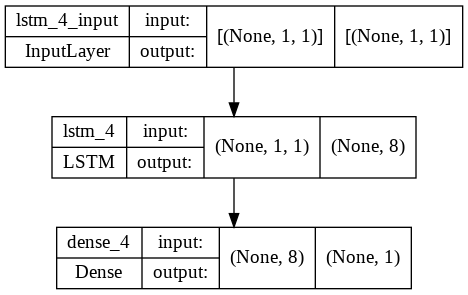

In [27]:
model_8_neuron = Sequential()
model_8_neuron.add(LSTM(8, input_shape=(1, look_back)))
model_8_neuron.add(Dense(1))

plot_model(model_8_neuron, show_shapes=True, show_layer_names=True)

In [28]:
model_8_neuron.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model_8_neuron.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0339 - mae: 0.1447 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0152 - mae: 0.0972 - 153ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0124 - mae: 0.0911 - 156ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0110 - mae: 0.0863 - 150ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0097 - mae: 0.0817 - 156ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0087 - mae: 0.0755 - 151ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0075 - mae: 0.0708 - 147ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0065 - mae: 0.0663 - 142ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0055 - mae: 0.0605 - 154ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0046 - mae: 0.0551 - 155ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0040 - mae: 0.0507 - 156ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0034 - mae: 0.0466 - 146ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0029 - mae: 0.0440 - 159ms/epoch - 2ms/st

In [29]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

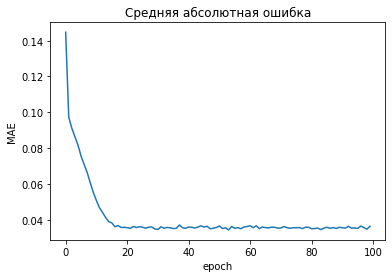

In [30]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [31]:
# Предсказание значений
trainPredict = model_8_neuron.predict(trainX)
testPredict = model_8_neuron.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.74 RMSE
Test Score: 48.13 RMSE


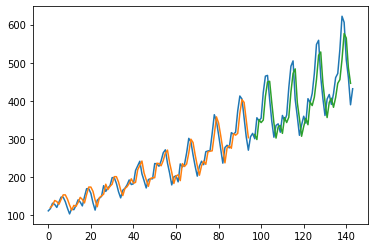

In [32]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Оптимизатор = rmsprop

In [33]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

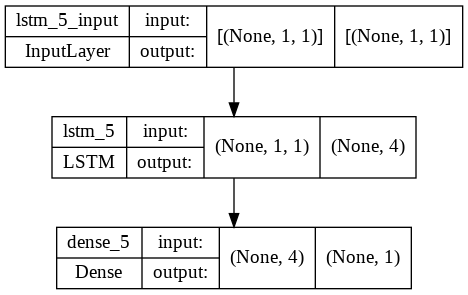

In [34]:
model_rmsprop = Sequential()
model_rmsprop.add(LSTM(4, input_shape=(1, look_back)))
model_rmsprop.add(Dense(1))

plot_model(model_rmsprop, show_shapes=True, show_layer_names=True)

In [35]:
model_rmsprop.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
ts_training = model_rmsprop.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0564 - mae: 0.1857 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0296 - mae: 0.1326 - 150ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0224 - mae: 0.1177 - 140ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0205 - mae: 0.1164 - 155ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0195 - mae: 0.1142 - 163ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0186 - mae: 0.1127 - 162ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0178 - mae: 0.1099 - 135ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0170 - mae: 0.1068 - 152ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0163 - mae: 0.1054 - 141ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0155 - mae: 0.1029 - 149ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0147 - mae: 0.0998 - 142ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0141 - mae: 0.0976 - 168ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0133 - mae: 0.0957 - 153ms/epoch - 2ms/st

In [36]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

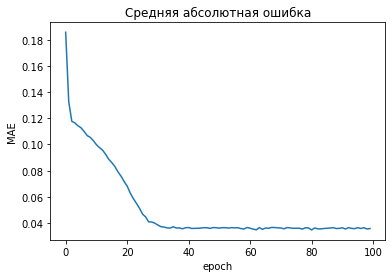

In [37]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [38]:
# Предсказание значений
trainPredict = model_rmsprop.predict(trainX)
testPredict = model_rmsprop.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.07 RMSE
Test Score: 48.04 RMSE


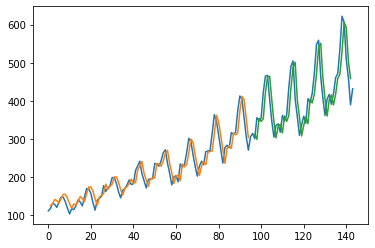

In [39]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Функция активации = exponential

In [40]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
model_exponential = Sequential()
model_exponential.add(LSTM(4, input_shape=(1, look_back), activation= "exponential"))
model_exponential.add(Dense(1))

plot_model(model_exponential, show_shapes=True, show_layer_names=True)

In [42]:
model_exponential.compile(loss='mean_squared_error', metrics=['mae'])
ts_training = model_exponential.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0637 - mae: 0.2133 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0249 - mae: 0.1308 - 124ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0215 - mae: 0.1208 - 140ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0188 - mae: 0.1108 - 139ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0159 - mae: 0.1038 - 126ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0137 - mae: 0.0964 - 181ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0114 - mae: 0.0874 - 133ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0093 - mae: 0.0803 - 138ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0074 - mae: 0.0702 - 128ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0061 - mae: 0.0624 - 139ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0048 - mae: 0.0563 - 139ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0039 - mae: 0.0509 - 140ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0033 - mae: 0.0454 - 139ms/epoch - 1ms/st

In [43]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

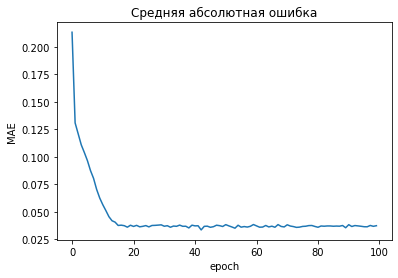

In [44]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [45]:
# Предсказание значений
trainPredict = model_exponential.predict(trainX)
testPredict = model_exponential.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.32 RMSE
Test Score: 50.77 RMSE


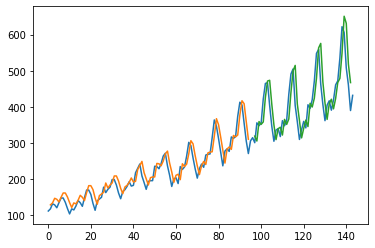

In [46]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. look_back = 4

In [47]:
look_back = 4
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [48]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [49]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
91/91 - 2s - loss: 0.0651 - mae: 0.2002 - 2s/epoch - 20ms/step
Epoch 2/100
91/91 - 0s - loss: 0.0274 - mae: 0.1268 - 156ms/epoch - 2ms/step
Epoch 3/100
91/91 - 0s - loss: 0.0179 - mae: 0.1069 - 148ms/epoch - 2ms/step
Epoch 4/100
91/91 - 0s - loss: 0.0150 - mae: 0.0992 - 140ms/epoch - 2ms/step
Epoch 5/100
91/91 - 0s - loss: 0.0131 - mae: 0.0934 - 146ms/epoch - 2ms/step
Epoch 6/100
91/91 - 0s - loss: 0.0116 - mae: 0.0879 - 137ms/epoch - 2ms/step
Epoch 7/100
91/91 - 0s - loss: 0.0098 - mae: 0.0812 - 140ms/epoch - 2ms/step
Epoch 8/100
91/91 - 0s - loss: 0.0084 - mae: 0.0738 - 153ms/epoch - 2ms/step
Epoch 9/100
91/91 - 0s - loss: 0.0071 - mae: 0.0679 - 144ms/epoch - 2ms/step
Epoch 10/100
91/91 - 0s - loss: 0.0061 - mae: 0.0633 - 140ms/epoch - 2ms/step
Epoch 11/100
91/91 - 0s - loss: 0.0053 - mae: 0.0583 - 136ms/epoch - 1ms/step
Epoch 12/100
91/91 - 0s - loss: 0.0047 - mae: 0.0547 - 131ms/epoch - 1ms/step
Epoch 13/100
91/91 - 0s - loss: 0.0043 - mae: 0.0518 - 144ms/epoch - 2ms/st

In [50]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

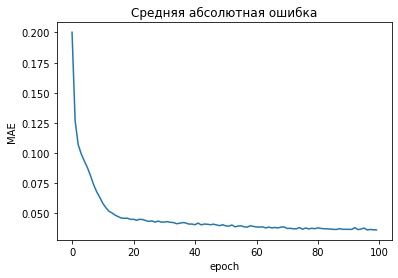

In [51]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [52]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.75 RMSE
Test Score: 72.32 RMSE


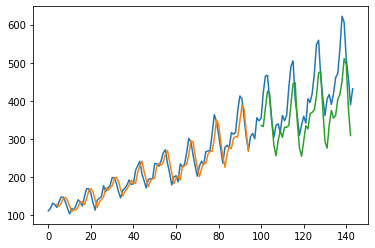

In [53]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Миронов

# Сеть с двумя слоями: LSTM слой с 16 нейронами и выходной слой, выдающий 1 значение.

In [54]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

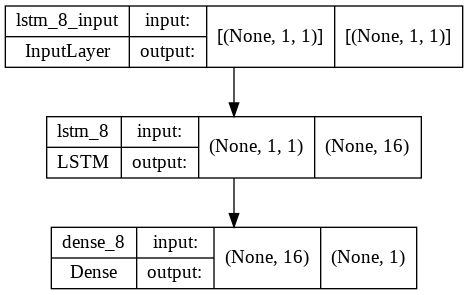

In [55]:
model_16_neuron = Sequential()
model_16_neuron.add(LSTM(16, input_shape=(1, look_back)))
model_16_neuron.add(Dense(1))

plot_model(model_16_neuron, show_shapes=True, show_layer_names=True)

In [56]:
model_16_neuron.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model_16_neuron.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0454 - mae: 0.1644 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0197 - mae: 0.1115 - 179ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0155 - mae: 0.1023 - 172ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0136 - mae: 0.0957 - 158ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0120 - mae: 0.0902 - 172ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0103 - mae: 0.0833 - 162ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0088 - mae: 0.0763 - 202ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0072 - mae: 0.0696 - 174ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0059 - mae: 0.0632 - 156ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0049 - mae: 0.0561 - 176ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0039 - mae: 0.0506 - 168ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0033 - mae: 0.0462 - 165ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0028 - mae: 0.0427 - 188ms/epoch - 2ms/st

In [57]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

In [58]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [59]:
# Предсказание значений
trainPredict = model_16_neuron.predict(trainX)
testPredict = model_16_neuron.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.69 RMSE
Test Score: 47.63 RMSE


In [60]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Оптимизатор = Adam(learning_rate=0.01)

In [61]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

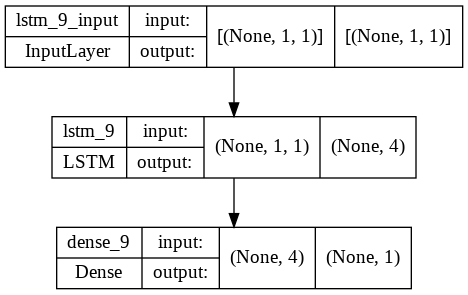

In [62]:
model_Adam = Sequential()
model_Adam.add(LSTM(4, input_shape=(1, look_back)))
model_Adam.add(Dense(1))

plot_model(model_Adam, show_shapes=True, show_layer_names=True)

In [63]:
from tensorflow import keras

optAdam = keras.optimizers.Adam(learning_rate=0.01)
model_Adam.compile(loss='mean_squared_error', optimizer=optAdam, metrics=['mae'])
ts_training = model_Adam.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0148 - mae: 0.0970 - 2s/epoch - 23ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0032 - mae: 0.0418 - 160ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0026 - mae: 0.0393 - 157ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0036 - mae: 0.0476 - 144ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0023 - mae: 0.0375 - 164ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0025 - mae: 0.0409 - 166ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0029 - mae: 0.0415 - 144ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0024 - mae: 0.0407 - 153ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0023 - mae: 0.0390 - 148ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0023 - mae: 0.0376 - 145ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0022 - mae: 0.0381 - 142ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0022 - mae: 0.0389 - 148ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0025 - mae: 0.0397 - 145ms/epoch - 2ms/st

In [64]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

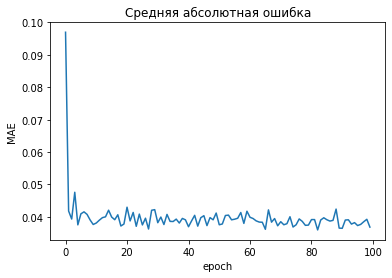

In [65]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [66]:
# Предсказание значений
trainPredict = model_Adam.predict(trainX)
testPredict = model_Adam.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.33 RMSE
Test Score: 69.30 RMSE


In [67]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Функция активации = elu

In [68]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

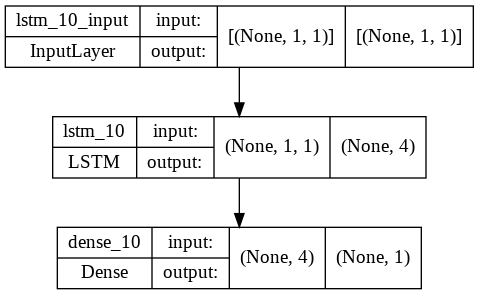

In [69]:
from keras import backend as K

model_elu = Sequential()
model_elu.add(LSTM(4, input_shape=(1, look_back), activation= K.elu))
model_elu.add(Dense(1))

plot_model(model_elu, show_shapes=True, show_layer_names=True)

In [70]:
model_elu.compile(loss='mean_squared_error', metrics=['mae'])
ts_training = model_elu.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0358 - mae: 0.1475 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0177 - mae: 0.1021 - 124ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0135 - mae: 0.0937 - 129ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0125 - mae: 0.0910 - 132ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0114 - mae: 0.0878 - 141ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0106 - mae: 0.0838 - 133ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0097 - mae: 0.0802 - 136ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0086 - mae: 0.0762 - 129ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0077 - mae: 0.0711 - 135ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0067 - mae: 0.0659 - 133ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0056 - mae: 0.0615 - 140ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0049 - mae: 0.0553 - 133ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0041 - mae: 0.0502 - 143ms/epoch - 2ms/st

In [71]:
ts_history_dict = ts_training.history
ts_history_dict.keys()

dict_keys(['loss', 'mae'])

In [72]:
# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [73]:
# Предсказание значений
trainPredict = model_elu.predict(trainX)
testPredict = model_elu.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.70 RMSE
Test Score: 49.05 RMSE


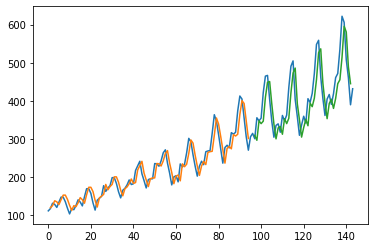

In [74]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. look_back = 8

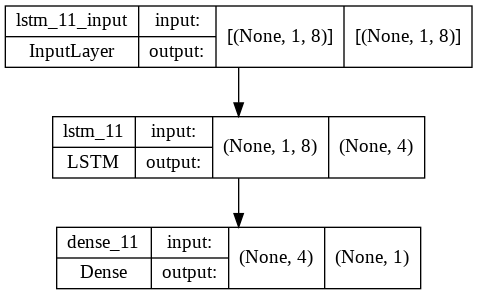

In [75]:
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [76]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
87/87 - 2s - loss: 0.0080 - mae: 0.0626 - 2s/epoch - 23ms/step
Epoch 2/100
87/87 - 0s - loss: 0.0051 - mae: 0.0547 - 145ms/epoch - 2ms/step
Epoch 3/100
87/87 - 0s - loss: 0.0050 - mae: 0.0546 - 134ms/epoch - 2ms/step
Epoch 4/100
87/87 - 0s - loss: 0.0045 - mae: 0.0521 - 158ms/epoch - 2ms/step
Epoch 5/100
87/87 - 0s - loss: 0.0043 - mae: 0.0489 - 159ms/epoch - 2ms/step
Epoch 6/100
87/87 - 0s - loss: 0.0046 - mae: 0.0512 - 150ms/epoch - 2ms/step
Epoch 7/100
87/87 - 0s - loss: 0.0043 - mae: 0.0500 - 150ms/epoch - 2ms/step
Epoch 8/100
87/87 - 0s - loss: 0.0041 - mae: 0.0470 - 155ms/epoch - 2ms/step
Epoch 9/100
87/87 - 0s - loss: 0.0041 - mae: 0.0473 - 145ms/epoch - 2ms/step
Epoch 10/100
87/87 - 0s - loss: 0.0040 - mae: 0.0483 - 137ms/epoch - 2ms/step
Epoch 11/100
87/87 - 0s - loss: 0.0038 - mae: 0.0446 - 145ms/epoch - 2ms/step
Epoch 12/100
87/87 - 0s - loss: 0.0038 - mae: 0.0455 - 144ms/epoch - 2ms/step
Epoch 13/100
87/87 - 0s - loss: 0.0037 - mae: 0.0454 - 137ms/epoch - 2ms/st

In [77]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [78]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.95 RMSE
Test Score: 58.28 RMSE


In [79]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Кухарев

# Сеть с двумя слоями: LSTM слой с 32 нейронами и выходной слой, выдающий 1 значение.

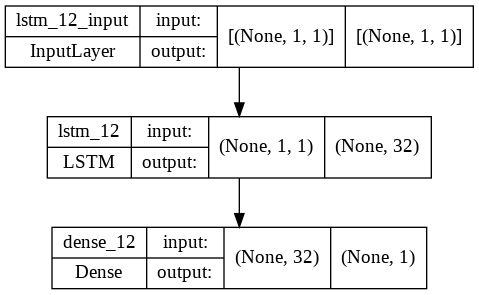

In [80]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model_32_neuron = Sequential()
model_32_neuron.add(LSTM(32, input_shape=(1, look_back)))
model_32_neuron.add(Dense(1))

plot_model(model_32_neuron, show_shapes=True, show_layer_names=True)

In [81]:
model_32_neuron.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model_32_neuron.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0309 - mae: 0.1332 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0136 - mae: 0.0962 - 182ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0114 - mae: 0.0884 - 168ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0093 - mae: 0.0789 - 174ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0072 - mae: 0.0694 - 197ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0055 - mae: 0.0625 - 184ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0043 - mae: 0.0526 - 198ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0031 - mae: 0.0441 - 205ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0026 - mae: 0.0416 - 214ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0023 - mae: 0.0373 - 199ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0022 - mae: 0.0375 - 169ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0022 - mae: 0.0365 - 172ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0021 - mae: 0.0362 - 171ms/epoch - 2ms/st

In [82]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [83]:
# Предсказание значений
trainPredict = model_32_neuron.predict(trainX)
testPredict = model_32_neuron.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.33 RMSE
Test Score: 47.42 RMSE


In [84]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Оптимизатор = SGD

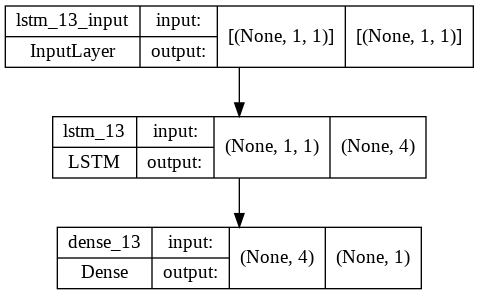

In [85]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model_SGD = Sequential()
model_SGD.add(LSTM(4, input_shape=(1, look_back)))
model_SGD.add(Dense(1))

plot_model(model_SGD, show_shapes=True, show_layer_names=True)

In [86]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizerSGD = keras.optimizers.SGD(learning_rate=lr_schedule)

model_SGD.compile(loss='mean_squared_error', optimizer=optimizerSGD, metrics=['mae'])
ts_training = model_SGD.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0271 - mae: 0.1239 - 2s/epoch - 18ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0166 - mae: 0.1046 - 131ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0159 - mae: 0.1028 - 139ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0159 - mae: 0.1048 - 135ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0159 - mae: 0.1031 - 143ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0157 - mae: 0.1023 - 143ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0157 - mae: 0.1029 - 146ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0155 - mae: 0.1025 - 146ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0154 - mae: 0.1022 - 139ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0152 - mae: 0.1011 - 142ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0151 - mae: 0.1006 - 144ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0150 - mae: 0.0995 - 139ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0149 - mae: 0.0998 - 140ms/epoch - 1ms/st

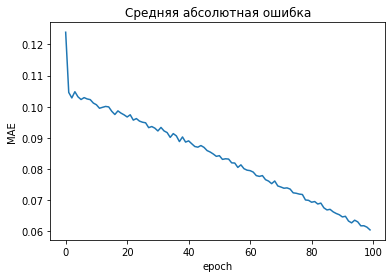

In [87]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [88]:
# Предсказание значений
trainPredict = model_Adam.predict(trainX)
testPredict = model_Adam.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.33 RMSE
Test Score: 69.30 RMSE


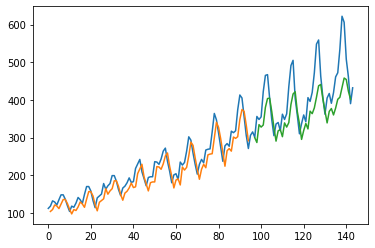

In [89]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Функция активации = softplus

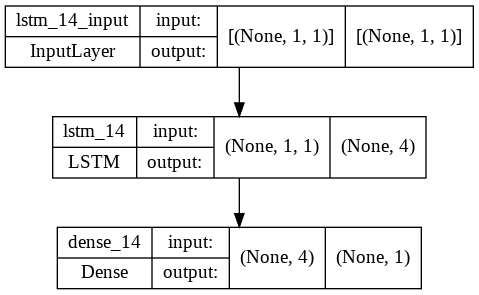

In [90]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

from keras import backend as K

model_softplus = Sequential()
model_softplus.add(LSTM(4, input_shape=(1, look_back), activation= K.softplus))
model_softplus.add(Dense(1))

plot_model(model_softplus, show_shapes=True, show_layer_names=True)

In [91]:
model_softplus.compile(loss='mean_squared_error', metrics=['mae'])
ts_training = model_softplus.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 1.3866 - mae: 1.1681 - 1s/epoch - 14ms/step
Epoch 2/100
94/94 - 0s - loss: 0.7537 - mae: 0.8573 - 146ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.3566 - mae: 0.5806 - 152ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.1305 - mae: 0.3361 - 139ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0362 - mae: 0.1536 - 138ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0160 - mae: 0.0985 - 158ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0148 - mae: 0.0987 - 147ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0146 - mae: 0.0981 - 154ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0143 - mae: 0.0973 - 144ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0140 - mae: 0.0955 - 166ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0138 - mae: 0.0956 - 152ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0135 - mae: 0.0950 - 147ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0131 - mae: 0.0937 - 134ms/epoch - 1ms/st

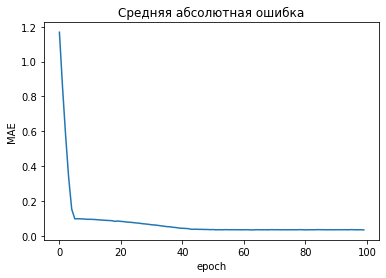

In [92]:
ts_history_dict = ts_training.history

# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [93]:
# Предсказание значений
trainPredict = model_softplus.predict(trainX)
testPredict = model_softplus.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.23 RMSE
Test Score: 52.95 RMSE


In [94]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. look_back = 16

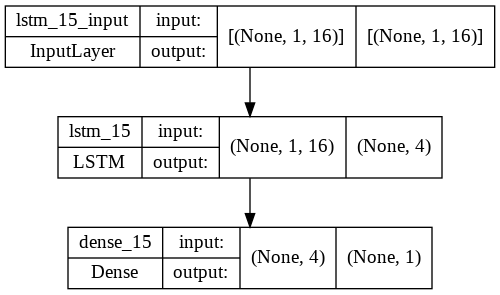

In [95]:
look_back = 16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [96]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
79/79 - 2s - loss: 0.0276 - mae: 0.1304 - 2s/epoch - 25ms/step
Epoch 2/100
79/79 - 0s - loss: 0.0057 - mae: 0.0576 - 122ms/epoch - 2ms/step
Epoch 3/100
79/79 - 0s - loss: 0.0046 - mae: 0.0528 - 122ms/epoch - 2ms/step
Epoch 4/100
79/79 - 0s - loss: 0.0039 - mae: 0.0484 - 129ms/epoch - 2ms/step
Epoch 5/100
79/79 - 0s - loss: 0.0036 - mae: 0.0452 - 128ms/epoch - 2ms/step
Epoch 6/100
79/79 - 0s - loss: 0.0032 - mae: 0.0433 - 139ms/epoch - 2ms/step
Epoch 7/100
79/79 - 0s - loss: 0.0030 - mae: 0.0419 - 127ms/epoch - 2ms/step
Epoch 8/100
79/79 - 0s - loss: 0.0028 - mae: 0.0406 - 134ms/epoch - 2ms/step
Epoch 9/100
79/79 - 0s - loss: 0.0025 - mae: 0.0383 - 148ms/epoch - 2ms/step
Epoch 10/100
79/79 - 0s - loss: 0.0024 - mae: 0.0380 - 122ms/epoch - 2ms/step
Epoch 11/100
79/79 - 0s - loss: 0.0023 - mae: 0.0373 - 127ms/epoch - 2ms/step
Epoch 12/100
79/79 - 0s - loss: 0.0021 - mae: 0.0360 - 131ms/epoch - 2ms/step
Epoch 13/100
79/79 - 0s - loss: 0.0020 - mae: 0.0354 - 125ms/epoch - 2ms/st

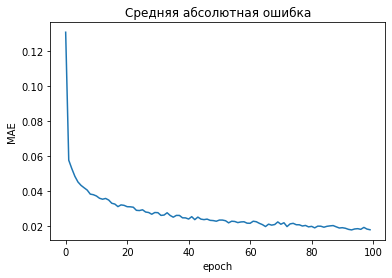

In [97]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [98]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12.22 RMSE
Test Score: 26.10 RMSE


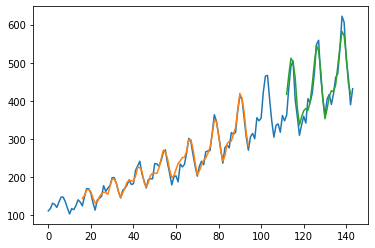

In [99]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Киселёв

# Сеть с двумя слоями: LSTM слой с 64 нейронами и выходной слой, выдающий 1 значение.

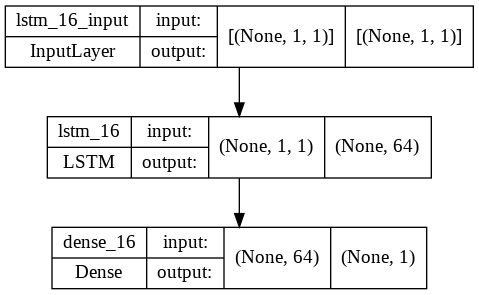

In [100]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model_64_neuron = Sequential()
model_64_neuron.add(LSTM(64, input_shape=(1, look_back)))
model_64_neuron.add(Dense(1))

plot_model(model_64_neuron, show_shapes=True, show_layer_names=True)

In [101]:
model_64_neuron.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model_64_neuron.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0269 - mae: 0.1166 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0112 - mae: 0.0869 - 197ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0086 - mae: 0.0744 - 169ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0065 - mae: 0.0656 - 176ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0044 - mae: 0.0542 - 199ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0032 - mae: 0.0461 - 194ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0026 - mae: 0.0402 - 191ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0023 - mae: 0.0366 - 192ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0022 - mae: 0.0369 - 182ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0019 - mae: 0.0343 - 173ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0024 - mae: 0.0385 - 174ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0021 - mae: 0.0367 - 170ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0021 - mae: 0.0360 - 203ms/epoch - 2ms/st

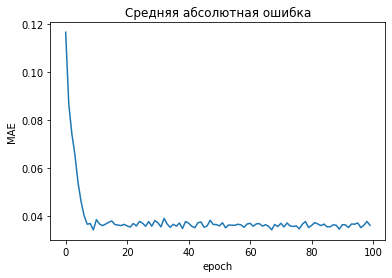

In [102]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [103]:
# Предсказание значений
trainPredict = model_64_neuron.predict(trainX)
testPredict = model_64_neuron.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.01 RMSE
Test Score: 47.74 RMSE


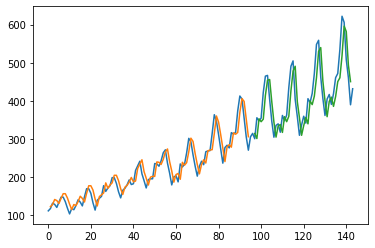

In [104]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

 # Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Оптимизатор = RMSprop

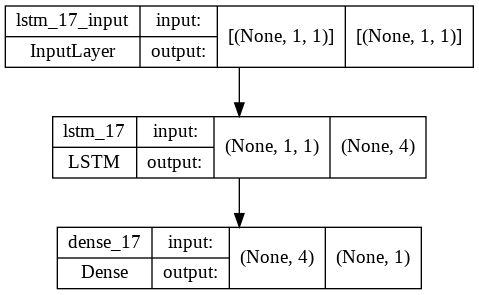

In [105]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model_RMSprop = Sequential()
model_RMSprop.add(LSTM(4, input_shape=(1, look_back)))
model_RMSprop.add(Dense(1))

plot_model(model_RMSprop, show_shapes=True, show_layer_names=True)

In [106]:
model_RMSprop.compile(loss='mean_squared_error', optimizer="RMSprop", metrics=['mae'])
ts_training = model_RMSprop.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0374 - mae: 0.1504 - 2s/epoch - 21ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0174 - mae: 0.1022 - 150ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0135 - mae: 0.0952 - 154ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0125 - mae: 0.0917 - 150ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0115 - mae: 0.0880 - 146ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0105 - mae: 0.0839 - 144ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0095 - mae: 0.0800 - 162ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0085 - mae: 0.0754 - 154ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0076 - mae: 0.0709 - 138ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0068 - mae: 0.0672 - 149ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0058 - mae: 0.0626 - 146ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0051 - mae: 0.0572 - 139ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0044 - mae: 0.0525 - 143ms/epoch - 2ms/st

In [107]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [108]:
# Предсказание значений
trainPredict = model_RMSprop.predict(trainX)
testPredict = model_RMSprop.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.07 RMSE
Test Score: 49.69 RMSE


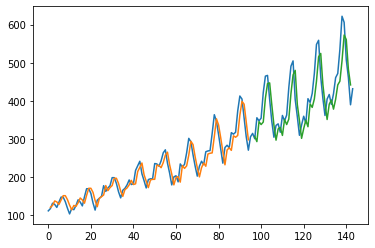

In [109]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. Функция активации = softsign

In [110]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

from keras import backend as K

model_softsign = Sequential()
model_softsign.add(LSTM(4, input_shape=(1, look_back), activation= K.softsign))
model_softsign.add(Dense(1))

plot_model(model_softsign, show_shapes=True, show_layer_names=True)

In [111]:
model_softsign.compile(loss='mean_squared_error', metrics=['mae'])
ts_training = model_softsign.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0527 - mae: 0.1799 - 1s/epoch - 13ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0297 - mae: 0.1298 - 136ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0224 - mae: 0.1172 - 126ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0197 - mae: 0.1129 - 134ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0187 - mae: 0.1113 - 130ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0180 - mae: 0.1106 - 134ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0174 - mae: 0.1089 - 128ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0169 - mae: 0.1074 - 150ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0162 - mae: 0.1045 - 128ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0155 - mae: 0.1018 - 135ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0147 - mae: 0.0994 - 140ms/epoch - 1ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0139 - mae: 0.0972 - 129ms/epoch - 1ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0131 - mae: 0.0933 - 131ms/epoch - 1ms/st

In [112]:
ts_history_dict = ts_training.history

# График ошибок
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [113]:
# Предсказание значений
trainPredict = model_softsign.predict(trainX)
testPredict = model_softsign.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.72 RMSE
Test Score: 61.31 RMSE


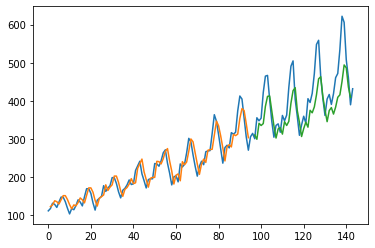

In [114]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Сеть с двумя слоями: LSTM слой с 4 нейронами и выходной слой, выдающий 1 значение. look_back = 32

In [115]:
look_back = 32
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# Преобразование входных данных в формат [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

plot_model(model, show_shapes=True, show_layer_names=True)

In [116]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
ts_training = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
63/63 - 2s - loss: 0.0351 - mae: 0.1480 - 2s/epoch - 29ms/step
Epoch 2/100
63/63 - 0s - loss: 0.0088 - mae: 0.0736 - 112ms/epoch - 2ms/step
Epoch 3/100
63/63 - 0s - loss: 0.0082 - mae: 0.0712 - 116ms/epoch - 2ms/step
Epoch 4/100
63/63 - 0s - loss: 0.0075 - mae: 0.0671 - 109ms/epoch - 2ms/step
Epoch 5/100
63/63 - 0s - loss: 0.0070 - mae: 0.0652 - 120ms/epoch - 2ms/step
Epoch 6/100
63/63 - 0s - loss: 0.0064 - mae: 0.0637 - 120ms/epoch - 2ms/step
Epoch 7/100
63/63 - 0s - loss: 0.0059 - mae: 0.0618 - 123ms/epoch - 2ms/step
Epoch 8/100
63/63 - 0s - loss: 0.0056 - mae: 0.0582 - 126ms/epoch - 2ms/step
Epoch 9/100
63/63 - 0s - loss: 0.0051 - mae: 0.0559 - 118ms/epoch - 2ms/step
Epoch 10/100
63/63 - 0s - loss: 0.0048 - mae: 0.0521 - 115ms/epoch - 2ms/step
Epoch 11/100
63/63 - 0s - loss: 0.0044 - mae: 0.0527 - 113ms/epoch - 2ms/step
Epoch 12/100
63/63 - 0s - loss: 0.0041 - mae: 0.0505 - 118ms/epoch - 2ms/step
Epoch 13/100
63/63 - 0s - loss: 0.0040 - mae: 0.0500 - 125ms/epoch - 2ms/st

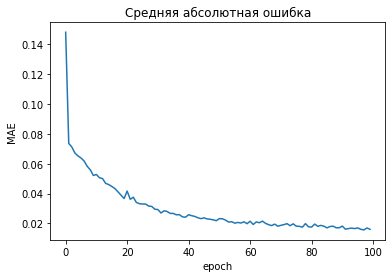

In [117]:
# График ошибок
ts_history_dict = ts_training.history
plt.plot(ts_history_dict['mae'])
plt.title('Средняя абсолютная ошибка')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [118]:
# Предсказание значений
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Выполняем обратное преобразование нормализованных данных
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Вычисляем среднеквадратическую ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.47 RMSE
Test Score: 21.37 RMSE


In [119]:
# Сдвигаем предсказанные значения для соответствия исходным по оси x
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Визуализируем исходные и предсказанные значения
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()